# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - ANAHUAC

### Introducción

En este desafio, usted usará herramientas de IBM como Watson Studio (o Cloud Pak for Data) para construir un modelo baseado en Machine Learning capaz de preveer si un estudante irá continuar o abandonará su curso.

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

/bin/bash: pip: command not found


In [2]:
!pip install xgboost --upgrade

/bin/bash: pip: command not found


<hr>

## Loading the .csv dataset from GitHub

In [3]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection import KFold, cross_validate, cross_val_score, RandomizedSearchCV
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA

In [4]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
df_base_for_training = pd.read_csv(r'ForTraining.csv')
df_base_for_training.head()

--2020-09-18 06:22:35--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/ForTraining.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92376 (90K) [text/plain]
Saving to: ‘ForTraining.csv.16’

ForTraining.csv.16  100%[===================>]  90.21K   304KB/s    in 0.3s    

2020-09-18 06:22:37 (304 KB/s) - ‘ForTraining.csv.16’ saved [92376/92376]



,studentId,reducido,ciclo,Graduado
0,88588.0,Interv. Edu.,2019 - 08,No
1,81135.0,Educacion,2019 - 05,Si
2,80926.0,Direc. Estrat. Neg,2019 - 05,Si
3,82415.0,B. I.,2019 - 06,Si
4,90082.0,Est. Temprana,2019 - 08,No


Descripción: La primera tabla mostrada arriba tiene 4 columnas, 3 son features and el target: `Graduado` that has a binary values={Si, No}.

Usted puede, y debe, usar mas data que esta disponible para construir su modelo. Los siguientes archivos .csv presentados:

In [5]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
df_orden_materias = pd.read_csv(r'OrdenMaterias.csv')
df_orden_materias.head(100)

--2020-09-18 06:22:37--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/OrdenMaterias.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63920 (62K) [text/plain]
Saving to: ‘OrdenMaterias.csv.16’

OrdenMaterias.csv.1 100%[===================>]  62.42K   266KB/s    in 0.2s    

2020-09-18 06:22:38 (266 KB/s) - ‘OrdenMaterias.csv.16’ saved [63920/63920]



,reducido,2017 - 03,2017 - 04,2017 - 05,2017 - 06,2017 - 07,2017 - 08,2018 - 01,2018 - 02,2018 - 03,...,2019 - 05,2019 - 06,2019 - 07,2019 - 08,2020 - 01,2020 - 02,2020 - 03,2020 - 04,2020 - 05,2020 - 06
0,Act. Derecho Contratual,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Sin clase,Sin clase,Sin clase,Sin clase,Consentimiento y objeto digital contractual,Métodos alternos de resolución de controversias,Nueva clasificación contractual,Nuevo derecho probatorio documental,Contratos inteligentes,Consentimiento y objeto digital contractual
1,Adm. Emp.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...,Mercadotecnia Estratégica,Contabilidad Financiera y Presupuestos,Administración de costos,Impuestos,Desafíos actuales en la Dirección del Capital ...
2,Adm. Riesgos,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones,Riesgos empresariales,Contabilidad Financiera y Presupuestos,Administración de riesgos,Evaluación de Riesgos,Toma de Decisiones
3,Adm. Salud,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Calidad en salud,Contabilidad Financiera y Presupuestos,Administración de costos,Salud pública,Planeación estratégica en salud,Calidad en salud,Contabilidad Financiera y Presupuestos,Planeación estratégica en salud,Salud pública,Planeación estratégica en salud
4,Admon Fin.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...,Decisión y Análisis de Inversión,Decisión de Financiamiento y Pago de Dividendos,Análisis de Estados Financieros,Estrategias de negocios,Planeación Financiera y Administración del Cap...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Planeacion Estrat.,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,...,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones,Mercadotecnia Estratégica,Calidad,Liderazgo y Motivación,Planeación Estratégica,Toma de Decisiones
96,Precios Transf.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Principios: Precios de Transferencia,Marco conceptual,BEPS,Metodología,Caso Práctico,Principios: Precios de Transferencia,Marco conceptual,BEPS,Metodología,Caso Práctico
97,Prin. Fiscales,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Principios: Precios de Transferencia,ISR Personas Morales,ISR Personas Físicas,IVA,ISR Personas Morales,Principios: Precios de Transferencia,ISR Personas Morales,ISR Personas Físicas,IVA,Código Fiscal
98,Prof. Deportiva.,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,Sin clase,...,Tendencias actuales de entrenamiento juvenil (...,Tendencias actuales de entrenamiento universit...,Metodología moderna de la preparación deportiva,Innovaciones en la preparación física contempo...,Tendencias actuales del entrenamiento infantil...,Tendencias actuales de entrenamiento juvenil (...,Tendencias actuales de entrenamiento universit...,Metodología moderna de la preparación deportiva,Innovaciones en la preparación física contempo...,Tendencias actuales del entrenamiento infantil...


In [6]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
df_tabla_conexiones = pd.read_csv(r'TablaConexiones.csv')
df_tabla_conexiones.head()

--2020-09-18 06:22:38--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaConexiones.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243492 (238K) [text/plain]
Saving to: ‘TablaConexiones.csv.15’

TablaConexiones.csv 100%[===================>] 237.79K   111KB/s    in 2.1s    

2020-09-18 06:22:41 (111 KB/s) - ‘TablaConexiones.csv.15’ saved [243492/243492]



,studentId,ciclo,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,45870,2017 - 03,10.0,76.957000,769.57
1,45898,2017 - 03,32.0,370.231250,11847.40
2,45905,2017 - 03,50.0,198.717400,9935.87
3,45931,2017 - 03,22.0,294.535909,6479.79
4,45933,2017 - 03,18.0,177.991667,3203.85


In [7]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
df_tabla_tareas = pd.read_csv(r'TablaTareas.csv')
df_tabla_tareas.head()

--2020-09-18 06:22:41--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/datasets/TablaTareas.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310923 (304K) [text/plain]
Saving to: ‘TablaTareas.csv.15’

TablaTareas.csv.15  100%[===================>] 303.64K   352KB/s    in 0.9s    

2020-09-18 06:22:43 (352 KB/s) - ‘TablaTareas.csv.15’ saved [310923/310923]



,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
0,81328.0,2019 - 05,99.000000,10.0,0.0,0.0,10.0
1,99206.0,2020 - 02,80.777500,10.0,2.0,0.0,12.0
2,94582.0,2020 - 01,79.666000,10.0,0.0,0.0,10.0
3,87564.0,2019 - 07,0.000000,0.0,15.0,0.0,15.0
4,87971.0,2019 - 08,36.363636,5.0,6.0,0.0,11.0


Overview del Dataset:

    Disponibles para el participante, ecisten 4 tables cargas en DataFrames anteriormente:
    
    **df_base_for_training**
        - ``studentId``
        ``reducido``
        ``ciclo``
        ``Graduado`` --> ¡LA VARIABLE OBJETIVO PARA CLASIFICACIÓN BINARIA!
        
    **df_orden_materias**
        ``reducido``
        ``2017 - 03``
        ``2017 - 04``
        ``2017 - 05``
        ``2017 - 06``
        ``2017 - 07``
        ``2017 - 08``
        ``2018 - 01``
        ``2018 - 02``
        ``2018 - 03``
        ``2018 - 04``
        ``2018 - 05``
        ``2018 - 06``
        ``2018 - 07``
        ``2018 - 08``
        ``2019 - 01``
        ``2019 - 02``
        ``2019 - 03``
        ``2019 - 04``
        ``2019 - 05``
        ``2019 - 06``
        ``2019 - 07``
        ``2019 - 08``
        ``2020 - 01``
        ``2020 - 02``
        ``2020 - 03``
        ``2020 - 04``
        ``2020 - 05``
        ``2020 - 06``
        
    **df_tabla_conexiones**
        - ``studentId``
        ``ciclo``
        ``Dias_Conectado``
        ``Minutos_Promedio``
        ``Minutos_Total``
        
    **df_tabla_tareas**
        - ``studentId``
        ``ciclo``
        ``Calificacion_Promedio``
        ``Tareas_Puntuales``
        ``Tareas_No_Entregadas``
        ``Tareas_Retrasadas``
        ``Total_Tareas``
        
Observe que la variable ``studentId`` aparece en varias tablas.

Usted puede combinar/merge estos datasets como usted desee.

In [8]:
print("Columnas en *df_base_for_training*:")
print(df_base_for_training.columns)

print("\Columnas en *df_orden_materias*:")
print(df_orden_materias.columns)

print("\Columnas en *df_tabla_conexiones*:")
print(df_tabla_conexiones.columns)

print("\Columnas en *df_tabla_tareas*:")
print(df_tabla_tareas.columns)

Columnas en *df_base_for_training*:
Index(['studentId', 'reducido', 'ciclo', 'Graduado'], dtype='object')
\Columnas en *df_orden_materias*:
Index(['reducido', '2017 - 03', '2017 - 04', '2017 - 05', '2017 - 06',
       '2017 - 07', '2017 - 08', '2018 - 01', '2018 - 02', '2018 - 03',
       '2018 - 04', '2018 - 05', '2018 - 06', '2018 - 07', '2018 - 08',
       '2019 - 01', '2019 - 02', '2019 - 03', '2019 - 04', '2019 - 05',
       '2019 - 06', '2019 - 07', '2019 - 08', '2020 - 01', '2020 - 02',
       '2020 - 03', '2020 - 04', '2020 - 05', '2020 - 06'],
      dtype='object')
\Columnas en *df_tabla_conexiones*:
Index(['studentId', 'ciclo', 'Dias_Conectado', 'Minutos_Promedio',
       'Minutos_Total'],
      dtype='object')
\Columnas en *df_tabla_tareas*:
Index(['studentId', 'ciclo', 'Calificacion_Promedio', 'Tareas_Puntuales',
       'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas'],
      dtype='object')


#### ¡ATENCIÓN! La columna **target** es  ``Graduado``, presente en el DataFrame "df_base_for_training".

<hr>

## Uniendo DataFrames en Pandas

Documentación oficial para Pandas 1.1.0: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Como un **ejemplo** de como usar Pandas, camos a unir/merge la información de las tablas "df_base_for_training" y "df_tabla_tareas" a traves de la llave ``studentId``.

Usted puee editar el dataframes manualmente si lo prefiere, usando Microsoft Excel u otros lenguajes. Recuerde insertar la data procesada en IBM Cloud Pak for Data para que pueda entrenar su modelo.

In [9]:
df_base_for_training.tail()

,studentId,reducido,ciclo,Graduado
2495,89685.0,Estrat. Comercial,2019 - 08,No
2496,77590.0,Crianza Hijos,2019 - 06,Si
2497,57623.0,Mercadotecnia,2018 - 02,Si
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No
2499,88250.0,Prof. Deportiva.,2019 - 08,No


In [10]:
df_tabla_tareas.tail()

,studentId,ciclo,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
6293,80467.0,2019 - 05,20.000000,1.0,4.0,0.0,5.0
6294,80249.0,2019 - 05,50.600000,3.0,2.0,0.0,5.0
6295,85857.0,2019 - 07,81.428571,13.0,1.0,0.0,14.0
6296,98880.0,2020 - 02,91.212727,11.0,0.0,0.0,11.0
6297,71859.0,2019 - 02,87.333000,10.0,0.0,0.0,10.0


In [11]:
df_base_for_training[df_base_for_training['studentId']==50018]

,studentId,reducido,ciclo,Graduado
2498,50018.0,Lider. Inst. Edu.,2017 - 05,No


In [12]:
# El resultado de esta celda sera la union de los dos anteriores dataframes
# usando la columna ``studentId`` como llave.

df = pd.merge(
    df_base_for_training, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0


In [13]:
df_m = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_m.tail()

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78
2499,91346.0,Psicopat. Adol.,2019 - 08,No,80.159333,15.0,0.0,0.0,15.0,26.0,230.841538,6001.88


In [14]:
df=df_m

In [15]:
def extraer_materia(x):
    reducido = x.reducido
    ciclo = x.ciclo
    return df_orden_materias[df_orden_materias['reducido']==reducido][ciclo].values[0]
df_val = df.apply(extraer_materia, axis=1)
df['materias'] = df_val
display(df)

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materias
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,Impuestos
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,Redes Neuronales
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,Evaluación de Instituciones Educativos
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,Evaluación de Instituciones Educativos


In [16]:
# Información acerca de las columnas del dataset unido
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              2500 non-null   float64
 1   reducido               2500 non-null   object 
 2   ciclo                  2500 non-null   object 
 3   Graduado               2500 non-null   object 
 4   Calificacion_Promedio  2500 non-null   float64
 5   Tareas_Puntuales       2500 non-null   float64
 6   Tareas_No_Entregadas   2500 non-null   float64
 7   Tareas_Retrasadas      2500 non-null   float64
 8   Total_Tareas           2500 non-null   float64
 9   Dias_Conectado         2500 non-null   float64
 10  Minutos_Promedio       2500 non-null   float64
 11  Minutos_Total          2500 non-null   float64
 12  materias               2500 non-null   object 
dtypes: float64(9), object(4)
memory usage: 273.4+ KB


In [17]:
display(df)

,studentId,reducido,ciclo,Graduado,Calificacion_Promedio,Tareas_Puntuales,Tareas_No_Entregadas,Tareas_Retrasadas,Total_Tareas,Dias_Conectado,Minutos_Promedio,Minutos_Total,materias
0,45898.0,Mercadotecnia,2017 - 03,Si,65.598667,13.0,2.0,0.0,15.0,32.0,370.231250,11847.40,Liderazgo y Motivación
1,45905.0,Intro. Fin,2017 - 03,No,86.482222,9.0,0.0,0.0,9.0,50.0,198.717400,9935.87,Finanzas para no Financieros
2,45931.0,Direc. Proy.,2017 - 03,No,63.196667,12.0,2.0,1.0,15.0,22.0,294.535909,6479.79,Liderazgo y Motivación
3,46063.0,Comp. Dig. Docentes,2017 - 03,Si,84.988333,8.0,0.0,4.0,12.0,29.0,471.421379,13671.22,La Tecnología en la Educación
4,46106.0,Gest. Esc.,2017 - 03,Si,68.542667,11.0,3.0,1.0,15.0,31.0,306.023226,9486.72,Liderazgo y Motivación
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,91320.0,Adm. Emp.,2019 - 08,No,71.818182,9.0,2.0,0.0,11.0,21.0,468.019048,9828.40,Impuestos
2496,91330.0,I. A.,2019 - 08,Si,81.333333,15.0,0.0,0.0,15.0,90.0,431.348000,38821.32,Redes Neuronales
2497,91331.0,Gest. Esc.,2019 - 08,No,73.333333,9.0,0.0,0.0,9.0,27.0,171.675926,4635.25,Evaluación de Instituciones Educativos
2498,91335.0,Gest. Esc.,2019 - 08,Si,85.185556,9.0,0.0,0.0,9.0,102.0,256.105686,26122.78,Evaluación de Instituciones Educativos


In [18]:
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')
    
class DataFrameImputer(TransformerMixin):
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
class DataScaleImputer(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        transformer = ColumnTransformer(transformers=[('scaler',StandardScaler(),features.values)])
        X_transform = transformer.fit_transform(df_temp[features.values])
        X_imputed_df = pd.DataFrame(data = X_transform, index = X.index, columns = features.values)        
        return pd.concat([df_temp[self.columns],X_imputed_df],axis=1)
    
class DataLabelEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X):
        return self
    
    def transform(self, X):    
        df_temp = X.copy()
        features = df_temp.columns.drop(self.columns)
        encoder = LabelEncoder()        
        df_encoder= df_temp[self.columns].apply(encoder.fit_transform)             
        return pd.concat([df_temp[features],df_encoder],axis=1)
    
class DataOneHotEncoderTransform(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):                
        return pd.get_dummies(X, columns=self.columns) 

In [19]:
def validar_nulos(df_temp):
    print(df_temp.shape)
    print("Valores nulos del df_training_dataset despues de la transformación DropNA: \n\n{}\n".format(df_temp.isnull().sum(axis = 0)))

In [20]:
df2 = DataFrameImputer().fit_transform(df)
validar_nulos(df2)

(2500, 13)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

studentId                0
reducido                 0
ciclo                    0
Graduado                 0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
materias                 0
dtype: int64



## Historgrama de varibales

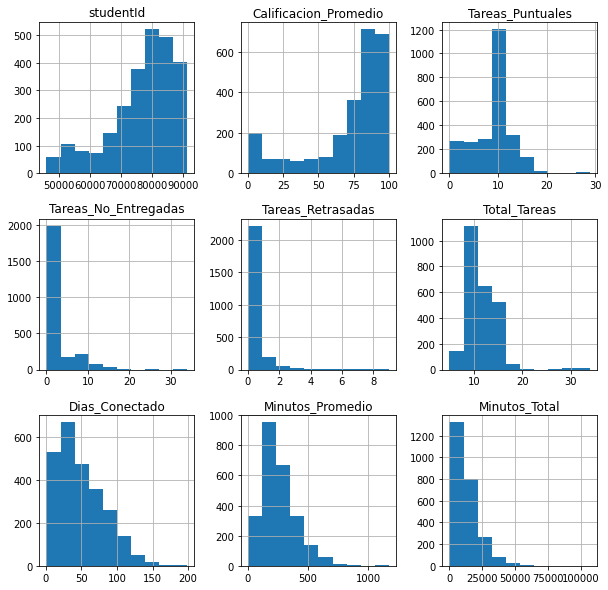

In [21]:
hist = df2.hist(figsize=(10,10))

In [22]:
semilla_aleatoria = 1234
umbral_categoria = 10
umbral_correlacion = 0.6
pd.options.display.max_columns=21
columna_target = 'Graduado'

In [23]:
def obtener_frecuencia_columnas(df_temp):
    columnas_con_frecuencia = [] 
    categorias_target=[]
    for columna in df_temp.columns:    
        df_frecuencia_cat=df_temp.groupby([columna],as_index=False).size()           
        
        if len(df_frecuencia_cat)<umbral_categoria:
            if columna != columna_target:
                columnas_con_frecuencia.append(columna)
            else:
                categorias_target = df_frecuencia_cat[columna].values                
            print(df_frecuencia_cat)
    return columnas_con_frecuencia, categorias_target
columnas_categoricas, categorias_target = obtener_frecuencia_columnas(df2)
print("Columnas con frecuencias: ",columnas_categoricas)
print("Categorias target: ",categorias_target)

  Graduado  size
0       No  1220
1       Si  1280
Columnas con frecuencias:  []
Categorias target:  ['No' 'Si']


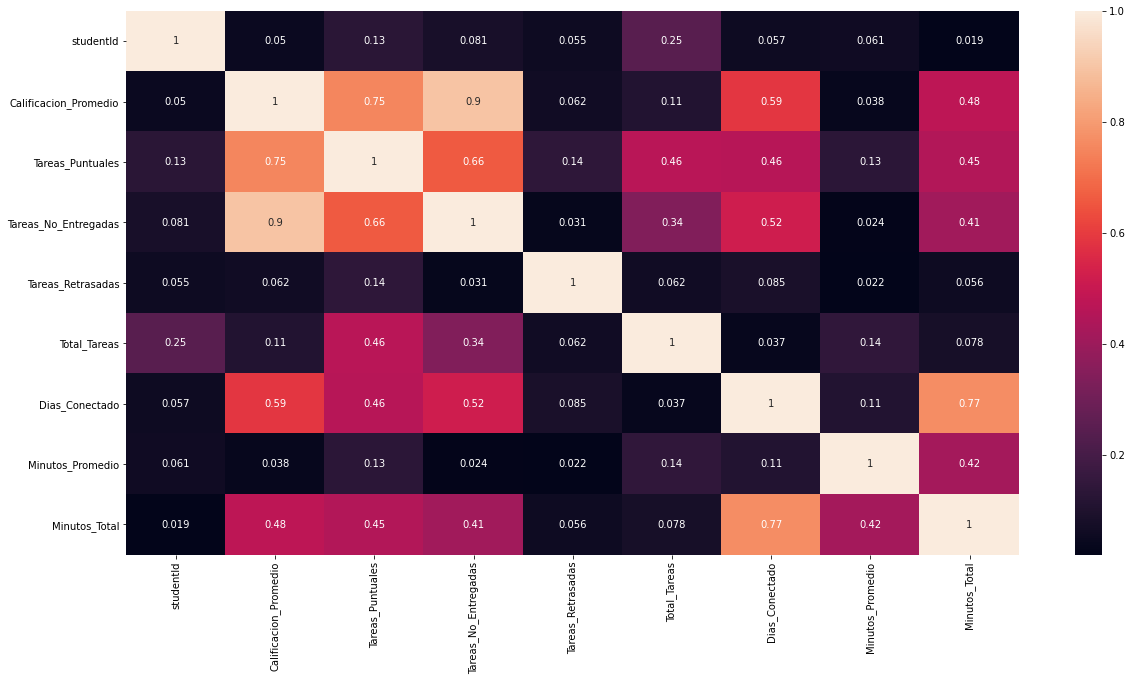

In [24]:
def graficar_correlaciones(df_temp):
    var_num = df_temp._get_numeric_data().columns.values.tolist()
    plt.figure(figsize = (20, 10))
    sns.heatmap(df_temp[var_num].corr().abs(), annot = True)
graficar_correlaciones(df2)

De la información de arriba ud puede observar que hay valores Null/NaN en algunas de las columnas.

Para que nuestro modelo quede bien entrenado necesitamos procesar estos valores nulos de una forma adecuada.

Usted escogera la mejor estrategia como parte del desafío, pero en la siguiente celda encuentra un **ejemplo** the como puede hacer este procesamiento usanto la libreria *scikit-learn*.

<hr>

## Pre-procesando el dataset antes de entrenar

### Borrando finlas con valores NaN

Usando el metodo Pandas DataFrame.dropna() usted puede remover todas las filas que estan indefinidas para la columna ``Graduado``.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [25]:
columnas_numericas = df2._get_numeric_data().columns.values.tolist()
columnas = df2.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
print(columnas_numericas)
print(columnas_no_numericas)

['studentId', 'Calificacion_Promedio', 'Tareas_Puntuales', 'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total']
['reducido', 'ciclo', 'Graduado', 'materias']


In [26]:
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)
validar_nulos(df3)

(2500, 13)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

reducido                 0
ciclo                    0
Graduado                 0
materias                 0
studentId                0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [27]:
columnas_encoder =  [v for v in columnas_no_numericas if v not in [columna_target] ]
df4 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df3)
validar_nulos(df4)

(2500, 13)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Graduado                 0
studentId                0
Calificacion_Promedio    0
Tareas_Puntuales         0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Total_Tareas             0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
reducido                 0
ciclo                    0
materias                 0
dtype: int64



# Representamos gráficamente las características

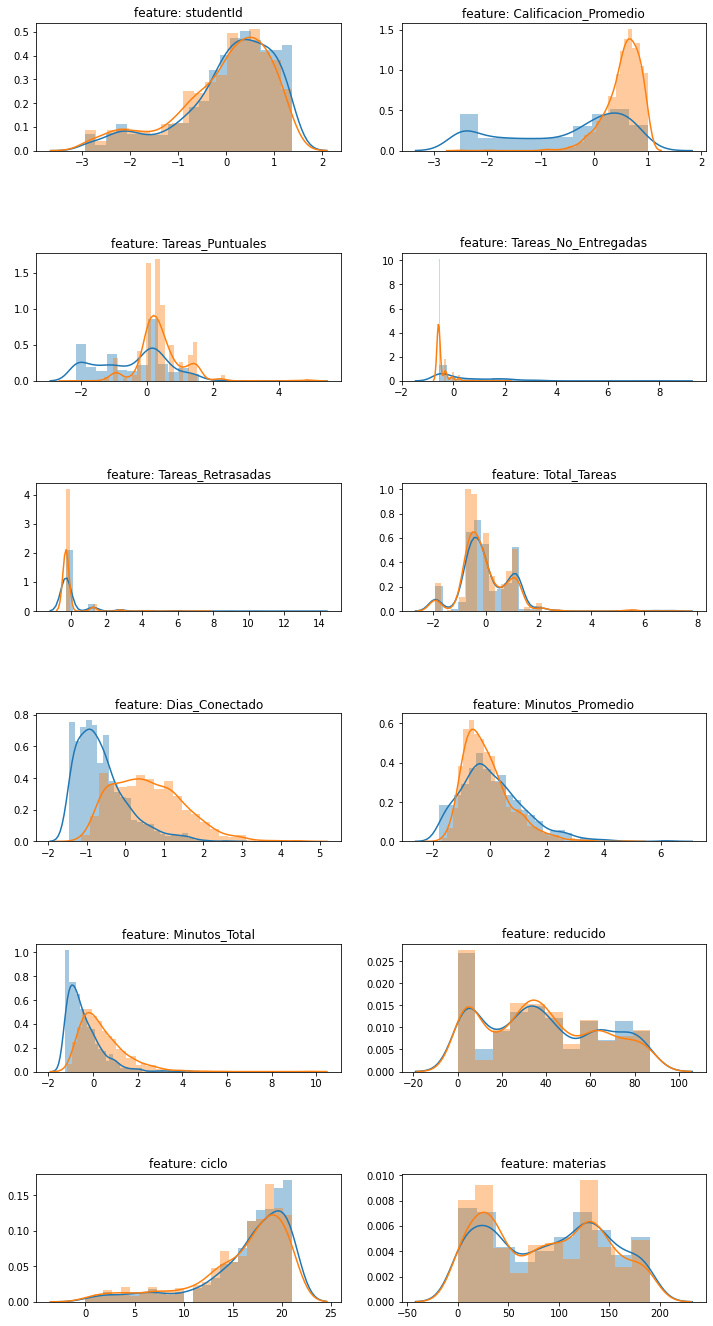

In [28]:
def graficar_caraterisitcas(df_norm,categorias_target,columna_target):   
    features = df_norm.drop(columna_target, axis=1)
    plt.figure(figsize=(12,32))
    gs = gridspec.GridSpec(8, 2)
    gs.update(hspace=0.8)

    for i, f in enumerate(features):
        ax = plt.subplot(gs[i])
        for col in categorias_target:
            sns.distplot(df_norm[f][df_norm[columna_target] == col])        
        ax.set_xlabel('')
        ax.set_title('feature: ' + str(f))
    plt.show()
graficar_caraterisitcas(df4,categorias_target,columna_target)

In [29]:
def plot_scatter_pca(finalDf, targets, col_target):    
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)    
    colors = ['c', 'g', 'b','y','r']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[col_target] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   
                   , s = 50)
    ax.legend(targets)
    ax.grid()

def graficar_modelo_PCA(df_temp,columna_target):
    columnas_modelo = [v for v in df_temp.columns if v not in [columna_target]]
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(df_temp[columnas_modelo])
    principalDf = pd.DataFrame(data = X_pca, index = df4.index
             , columns = ['principal component 1', 'principal component 2'])
    finalDf = pd.concat([principalDf, df_temp[columna_target]], axis = 1)
    plot_scatter_pca(finalDf,categorias_target, columna_target)
    
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


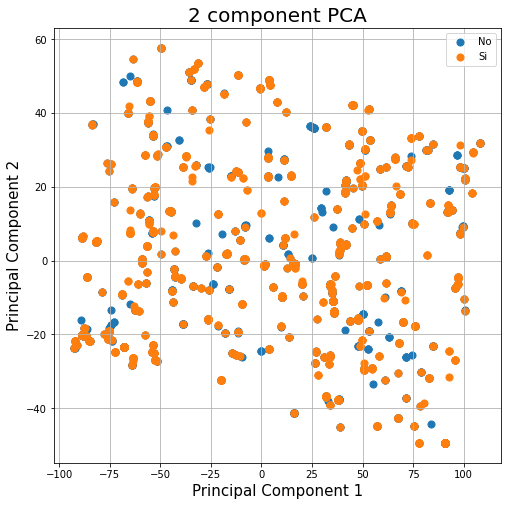

In [30]:
graficar_modelo_PCA(df4,columna_target)

(2500, 7)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Graduado                 0
Calificacion_Promedio    0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



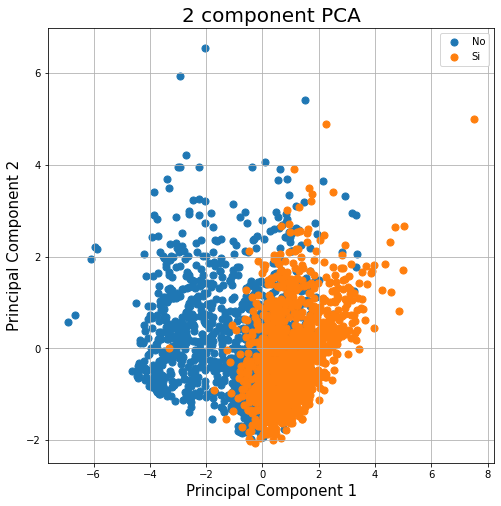

In [96]:
df5 = DropColumns(columns=['studentId','materias','reducido','ciclo','Total_Tareas','Tareas_Puntuales']).fit_transform(df4)
validar_nulos(df5)
graficar_modelo_PCA(df5,columna_target)

In [98]:
import random
def agregar_datos_sinteticos(df_val,columna_target):
    for targ in categorias_target:
        df_graduado = df_val[df_val[columna_target]==targ]
        for i in range (0,12500):
            columnas = df_graduado.columns.values    
            index = random.randint(1000000000, 90000000000)       
            df_temp = pd.DataFrame(data=[], index=[index],columns = columnas)
            for columna in columnas:       
                df_seleccionado = df_graduado.sample()
                df_temp.at[index , columna] = df_seleccionado[columna].values[0]                    
            df_val=pd.concat([df_val,df_temp])
    return df_val
df6 = agregar_datos_sinteticos(df5,columna_target)
validar_nulos(df6)

(23500, 7)
Valores nulos del df_training_dataset despues de la transformación DropNA: 

Graduado                 0
Calificacion_Promedio    0
Tareas_No_Entregadas     0
Tareas_Retrasadas        0
Dias_Conectado           0
Minutos_Promedio         0
Minutos_Total            0
dtype: int64



In [99]:
columnas_modelo = [v for v in df6.columns if v not in ['Graduado']]
print(columnas_modelo)

features = df6[
    columnas_modelo
]

target = df6['Graduado']  ## No cambie la variable target!
display(features)

['Calificacion_Promedio', 'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Dias_Conectado', 'Minutos_Promedio', 'Minutos_Total']


,Calificacion_Promedio,Tareas_No_Entregadas,Tareas_Retrasadas,Dias_Conectado,Minutos_Promedio,Minutos_Total
0,-0.206253,-0.0435348,-0.28054,-0.51672,0.763118,-0.0351516
1,0.530346,-0.57059,-0.28054,0.0276542,-0.413968,-0.231041
2,-0.290975,-0.0435348,1.25414,-0.819151,0.243627,-0.585211
3,0.477654,-0.57059,5.85818,-0.60745,1.45758,0.151749
4,-0.102413,0.219993,1.25414,-0.546964,0.322464,-0.277068
...,...,...,...,...,...,...
39893790853,0.760239,-0.57059,1.25414,1.93297,0.32487,-0.0906114
21018779926,0.814749,-0.307062,-0.28054,-0.486477,-0.220626,-0.169558
31768466417,0.977733,-0.57059,-0.28054,1.1164,0.137922,1.08131
85800539132,0.600971,-0.57059,-0.28054,1.38859,-0.536597,-0.102581


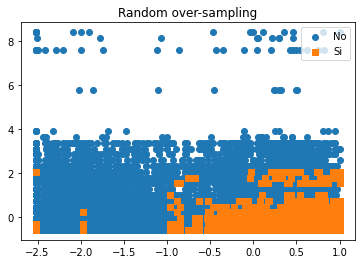

In [100]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomOverSampler(sampling_strategy='auto')
X_rus, y_rus = rus.fit_sample(features, target)
plot_2d_space(X_rus.values, y_rus, 'Random over-sampling')

In [101]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

In [107]:
dtc_model = RandomForestClassifier(n_estimators= 1400, min_samples_split= 2, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 100, bootstrap= True)
dtc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                       n_estimators=1400)

In [108]:
y_pred = dtc_model.predict(X_test)
print(y_pred)

['Si' 'Si' 'No' ... 'No' 'Si' 'Si']


In [109]:
print("model score: %.3f" % dtc_model.score(X_test, y_test))
print("Exactitud: {}%".format(100*round(accuracy_score(y_test, y_pred), 2)))

model score: 0.915
Exactitud: 92.0%


Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.915\nPrecision=0.889\nRecall=0.946\nF1 Score=0.9164918170373479')

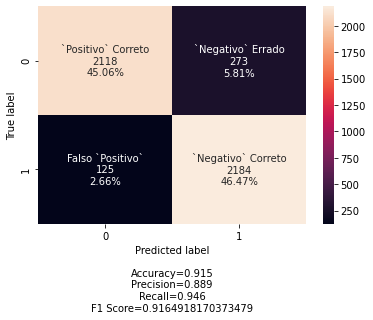

In [110]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['`Positivo` Correto', '`Negativo` Errado', 'Falso `Positivo`', '`Negativo` Correto']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt="")
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

<hr>

### Tunning de los Hiperparametros de los Modelos
Correr únicamente si se desea hacer una mejora en los hiper parametros

parameter_space = {
    'n_estimators':  [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 4],
    'bootstrap': [True, False]
}

clf_CV = RandomizedSearchCV(clf_rfo, parameter_space, n_jobs=-1, cv=5)
clf_CV.fit(X_train, y_train) 
print('Los parametros optimizados son:\n', clf_CV.best_params_)

parameter_space = {
    'RFOR__n_estimators':  [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'RFOR__max_features': ['auto', 'sqrt'],
    'RFOR__max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
    'RFOR__min_samples_split': [2, 5, 10],
    'RFOR__min_samples_leaf':  [1, 2, 4],
    'RFOR__bootstrap': [True, False],        
    'RNN__hidden_layer_sizes': [(10,40,2),(20,100,4),(20,100,2),(100,100,8),(10,200,4)],
    'RNN__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'RNN__solver': ['sgd', 'adam'],
    'RNN__alpha': [0.0001, 0.05, 0.02, 0.1],
    'RNN__max_iter': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 6)],              
    'RNN__learning_rate': ['constant','adaptive'],
    'ABO__n_estimators':  [int(x) for x in np.linspace(start = 50, stop = 2000, num = 12)],
    'ABO__learning_rate': [1.0, 0.1, 0.01, 0.001],
    'ABO__algorithm': ['SAMME', 'SAMME.R'],    
    'XGB__objective':'reg:linear',
    'XGB__learning_rate': [0.01, 0.1],
    'XGB__max_depth': [3, 5, 7, 10],
    'XGB__min_child_weight': [1, 3, 5, 7],
    'XGB__subsample': [0.5, 0.7, 1],
    'XGB__colsample_bytree': [0.5, 0.7, 1 ],
    'XGB__n_estimators' : [100, 200, 500],
    'XGB__objective': ['reg:squarederror','reg:linear']

}

clf_CV = RandomizedSearchCV(dtc_model, parameter_space, n_jobs=-1, cv=5)
clf_CV.fit(X_train, y_train) 
print('Los parametros optimizados son:\n', clf_CV.best_params_)

<hr>

## Scoring de la data requerida para hacer la entrega de la solución

Para el envío, necesita clasificar el siguiente dataset. Para hacer eso, usted necesita reproducir los mismos pasos de pre-procesamiento para que el dataset este en la misma estructura del que usted uso para construir su modelo. Despues de clasificar este dataframe, esperamos que usted entregue un archivo csv con las 2499 filar y una columna 'Graduado' con su predicción. **No cambie el orden del archivo a predecir ni borre filas**

In [113]:
!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
df_to_be_predicted = pd.read_csv(r'ToBePredicted.csv')
df_to_be_predicted.tail()

--2020-09-18 07:05:10--  https://raw.githubusercontent.com/vanderlei-test/dataset2/master/for_submission/ToBePredicted.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.204.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.204.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33892 (33K) [text/plain]
Saving to: ‘ToBePredicted.csv.9’

ToBePredicted.csv.9 100%[===================>]  33.10K  --.-KB/s    in 0.1s    

2020-09-18 07:05:11 (250 KB/s) - ‘ToBePredicted.csv.9’ saved [33892/33892]



,studentId,reducido,ciclo
995,79594.0,Diagn. Psicoped.,2019 - 05
996,69470.0,Ventas Estrat.,2018 - 08
997,72921.0,Big Data,2019 - 02
998,80608.0,Interv. Psicoped,2019 - 05
999,86966.0,Interv. Psicoped,2019 - 07


In [114]:
df = pd.merge(
    df_to_be_predicted, df_tabla_tareas, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)

df_m = pd.merge(
    df, df_tabla_conexiones, how='inner',
    on=None, left_on=['studentId', 'ciclo'], right_on=['studentId', 'ciclo'],
    left_index=False, right_index=False, sort=True,
    suffixes=('_x', '_y'), copy=True, indicator=False,
    validate=None
)
df_m.tail()
df=df_m
df_val = df.apply(extraer_materia, axis=1)
df['materias'] = df_val
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   studentId              1000 non-null   float64
 1   reducido               1000 non-null   object 
 2   ciclo                  1000 non-null   object 
 3   Calificacion_Promedio  1000 non-null   float64
 4   Tareas_Puntuales       1000 non-null   float64
 5   Tareas_No_Entregadas   1000 non-null   float64
 6   Tareas_Retrasadas      1000 non-null   float64
 7   Total_Tareas           1000 non-null   float64
 8   Dias_Conectado         1000 non-null   float64
 9   Minutos_Promedio       1000 non-null   float64
 10  Minutos_Total          1000 non-null   float64
 11  materias               1000 non-null   object 
dtypes: float64(9), object(3)
memory usage: 101.6+ KB


In [116]:
columnas_numericas = df._get_numeric_data().columns.values.tolist()
columnas = df.columns.values.tolist()
columnas_no_numericas = [v for v in columnas if v not in columnas_numericas]
df2 = DataFrameImputer().fit_transform(df)
df3 = DataScaleImputer(columns=columnas_no_numericas).fit_transform(df2)
df4 = DataLabelEncoderTransform(columns=columnas_encoder).fit_transform(df3)
df5 = DropColumns(columns=['studentId','materias','reducido','ciclo','Total_Tareas','Tareas_Puntuales']).fit_transform(df4)

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Calificacion_Promedio  1000 non-null   float64
 1   Tareas_No_Entregadas   1000 non-null   float64
 2   Tareas_Retrasadas      1000 non-null   float64
 3   Dias_Conectado         1000 non-null   float64
 4   Minutos_Promedio       1000 non-null   float64
 5   Minutos_Total          1000 non-null   float64
dtypes: float64(6)
memory usage: 54.7 KB


Observando los features declarados acontinuación, sabemos que el dataset ha ser evaluado esta en el mismo formato usado para entrenar nuestro árbol de decisión anteriormente.

```features = df3[
    [
        'studentId', 'Calificacion_Promedio', 'Tareas_Puntuales',
        'Tareas_No_Entregadas', 'Tareas_Retrasadas', 'Total_Tareas',
        'ciclo_2017 - 03', 'ciclo_2017 - 04', 'ciclo_2017 - 05',
        'ciclo_2017 - 06', 'ciclo_2017 - 07', 'ciclo_2017 - 08',
        'ciclo_2018 - 01', 'ciclo_2018 - 02', 'ciclo_2018 - 03',
        'ciclo_2018 - 04', 'ciclo_2018 - 05', 'ciclo_2018 - 06',
        'ciclo_2018 - 07', 'ciclo_2018 - 08', 'ciclo_2019 - 01',
        'ciclo_2019 - 02', 'ciclo_2019 - 03', 'ciclo_2019 - 04',
        'ciclo_2019 - 05', 'ciclo_2019 - 06', 'ciclo_2019 - 07',
        'ciclo_2019 - 08'
    ]
]
target = df3['Graduado']  ## No cambie la variable target!```

In [118]:
y_pred = dtc_model.predict(df5)
print(y_pred)

['Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'No' 'Si'
 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si'
 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'No'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No'
 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No' 'No' 'Si' 'Si' 'No'
 'Si' 'Si' 'No' 'Si' 'No' 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'Si' 'No' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si' 'Si'
 'No' 'Si' 'Si' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No' 'Si' 'Si'
 'Si' 'No' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'No' 'No' 'No' 'Si' 'Si' 'Si'
 'Si' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'Si' 'No' 'No' 'Si' 'No' 'Si' 'No'
 'No' 'Si' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'No'
 'No' 'No' 'Si' 'No' 'No' 'No' 'Si' 'Si' 'Si' 'Si' 'No' 'Si' 'Si' 'No'
 'Si' 

### Guardando los resultados de la predicción en un archivo csv

In [119]:
np.savetxt("results.csv", y_pred, delimiter=",", fmt='%s')

In [120]:
project.save_data(file_name="results.csv", data=pd.read_csv("results.csv", header=None).to_csv(header=["TARGET"], index=False))

NameError: name 'project' is not defined

<hr>

## ¡Felicitaciones!

Si todo fue ejecutado sin errores, usted ya tiene un modelo basado en classificacion binaria y puede descargar sus resultados para subirlos como csv!

Para enviar su solución, ve a la página:

# https://anahuac.maratona.dev
